# <b><span style = "color:#478f4d;font-family:helvetica"> Introduction to Semantics and Sentiment Analysis

### <b><span style = "color:#478f4d;font-family:helvetica">  Topics Overview:
**1. Understand Semantic Word Vectors.**
   

**2. Understand Sentiment Analysis**

**3. Leverage Sentiment Analysis for Text Classification.**

## <b><span style = "color:#478f4d;font-family:helvetica">Semantics and Word Vectors

#### In order to use `Spacy's` embedded word vectors, we must downalod th larger spacy english models.

#### Full details can be found at:
* https://spacy.io/usage/models

### Either to download the medium or large spacy english models:

### `python -m spacy downalod  en_core_web_md`

### `python -m spacy downalod  en_core_web_lg`

### We now have larger models that contain the word vectors, Let's see how word vectors are created.

* `Word2vec` is a two-layer neural net that process text.
* Its input is a text corpus and its output is set of vectors: feature vectors for words in that corpus.

* The purpose and usefulness of `Word2vec` is to group the vectors of similar words together in vectorsace.
* That is , it detects simlarities mathematically.

* `Word2vec` creates vectors that are distributed numerical representations of word features, features such as the context of individual words.
* It does so without human intervention

### Theoritically:
* Given enough data, usage and contexts, `Word2Vec`can make highly accurate guesses about a word's meaning based on past appearances.
* Those guesses can be used to establish a word's association with other(e.g. "man" is to "boy" what "woman" is to "girl")

* `Word2vec` trains words against other words that neighbor them in the input corpus.
* It does so in of two ways, either using context to predict a target word(a methhod know as continous bad of words, or `CBOW`, or using a word to predict a target context, which is called `skip-gram`.

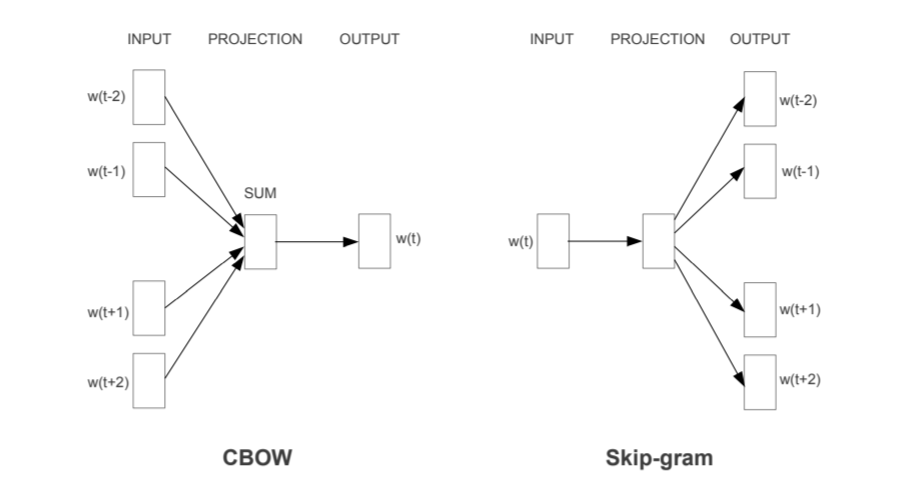

* Recall that each word is now representted by a `vector`.
* In `Spacy` each of these vectors has 300 dimensions

### This means since we have each word mapped to a vector in this 300 dimensional space, we can use  Cosine Similarity to measure how similar word vectors are to each other.

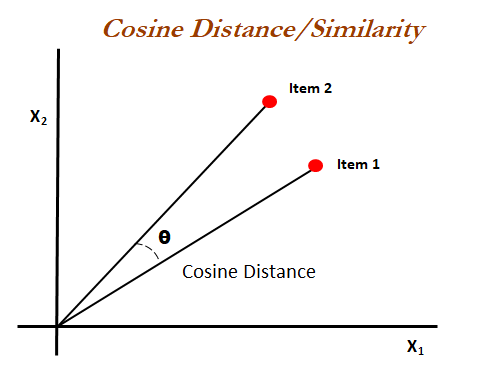

#### `Cosine Similarities` are just checking the distance between the two vectors.

### This means we canalso perform vector arithmetic with the word vectors.
   * new_vector = King - man + woman

### This creates new vectors(not directly assocaited with a word) that we can then attempt to find most similar vectors to.
   * new_vector closest to vector for queen

### This ables to really establish interesting relationships between the word vectors

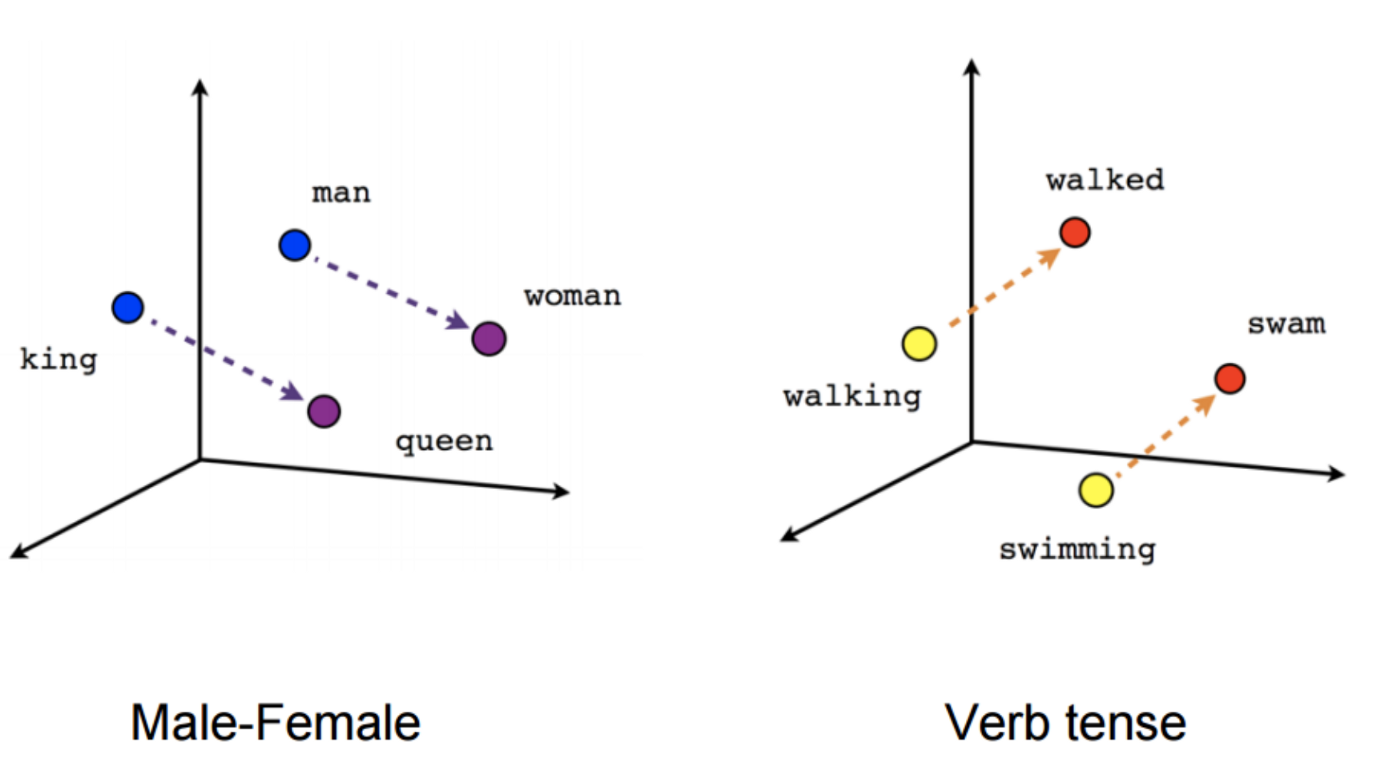

# <b><span style = "color:#478f4d;font-family:helvetica"> Semantics and Word Vectors with `Spacy` with Python

In [1]:
import  spacy

In [2]:
nlp = spacy.load('en_core_web_lg')

In [4]:
nlp(u"lion").vector

array([ 1.8963e-01, -4.0309e-01,  3.5350e-01, -4.7907e-01, -4.3311e-01,
        2.3857e-01,  2.6962e-01,  6.4332e-02,  3.0767e-01,  1.3712e+00,
       -3.7582e-01, -2.2713e-01, -3.5657e-01, -2.5355e-01,  1.7543e-02,
        3.3962e-01,  7.4723e-02,  5.1226e-01, -3.9759e-01,  5.1333e-03,
       -3.0929e-01,  4.8911e-02, -1.8610e-01, -4.1702e-01, -8.1639e-01,
       -1.6908e-01, -2.6246e-01, -1.5983e-02,  1.2479e-01, -3.7276e-02,
       -5.7125e-01, -1.6296e-01,  1.2376e-01, -5.5464e-02,  1.3244e-01,
        2.7519e-02,  1.2592e-01, -3.2722e-01, -4.9165e-01, -3.5559e-01,
       -3.0630e-01,  6.1185e-02, -1.6932e-01, -6.2405e-02,  6.5763e-01,
       -2.7925e-01, -3.0450e-03, -2.2400e-02, -2.8015e-01, -2.1975e-01,
       -4.3188e-01,  3.9864e-02, -2.2102e-01, -4.2693e-02,  5.2748e-02,
        2.8726e-01,  1.2315e-01, -2.8662e-02,  7.8294e-02,  4.6754e-01,
       -2.4589e-01, -1.1064e-01,  7.2250e-02, -9.4980e-02, -2.7548e-01,
       -5.4097e-01,  1.2823e-01, -8.2408e-02,  3.1035e-01, -6.33

### We can see now actual vector component  for line and notice there are tons of dimension here that means we have lot of information contained in this vector version of the word.

In [6]:
nlp(u"The quick brownforx jumped").vector.shape

(300,)

#### Documents becomes average  for all single word.

### Now lets try to identify similar vectors/words.

#### The best way to expose vector relationship is  to use `.similarity` method of the actual  document tokens.

In [7]:
tokens = nlp(u"lion cat pet")

In [9]:
for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

lion lion 1.0
lion cat 0.5265436768531799
lion pet 0.399237722158432
cat lion 0.5265436768531799
cat cat 1.0
cat pet 0.7505456209182739
pet lion 0.399237722158432
pet cat 0.7505456209182739
pet pet 1.0


### Similarity Values will be between zero and 1.

### Something we should keep in mind is that words that have opposite meaning but they often appear in same context may have similar vectors as well 

In [10]:
tokens = nlp(u"like love hate")

In [11]:
for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

like like 1.0
like love 0.6579040288925171
like hate 0.6574652194976807
love like 0.6579040288925171
love love 1.0
love hate 0.6393098831176758
hate like 0.6574652194976807
hate love 0.6393098831176758
hate hate 1.0


###  <b><span style = "color:#478f4d;font-family:helvetica"> It is sometime helpful to aggreagte 300 dimesions to `Euclidean  L2 norm` basically it means we will compute this as a square root of sum of squared vectors and this is actually accisible to vector attribute called `vector_norm`

In [13]:
len(nlp.vocab.vectors)

342918

In [14]:
nlp.vocab.vectors.shape

(342918, 300)

In [26]:
tokens = nlp("dog cat nargle Mary")

In [27]:
for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)## oov is out of vocabulary

dog True 7.0336733 False
cat True 6.6808186 False
nargle False 0.0 True
Mary True 6.525722 False


###  <b><span style = "color:#478f4d;font-family:helvetica"> Vector arithmetic

### Believe it or not  we can actually calculate new vector by adding and subtracting related vector

In [28]:
from scipy import spatial

In [29]:
cosine_similarity = lambda vec1, vec2: 1-  spatial.distance.cosine(vec1,vec2)

In [30]:
king= nlp.vocab['king'].vector
man = nlp.vocab["man"].vector
woman = nlp.vocab["woman"].vector

In [31]:
## king - man + woman ---> new_vector will be similar to queen, princess

In [32]:
new_vector = king- man + woman

In [35]:
computed_simialrities = []

for word in nlp.vocab:#for all words in vocab
    if word.has_vector:
        if word.is_lower:
            if word.is_alpha:
                similarity = cosine_similarity(new_vector, word.vector)
                computed_simialrities.append((word, similarity))
    

In [38]:
computed_simialrities = sorted(computed_simialrities, key = lambda item:-item[1])

In [41]:
print([t[0].text for t in computed_simialrities[:3]])

['king', 'woman', 'she']


#  <b><span style = "color:#478f4d;font-family:helvetica">  Sentiment Analysis  Overview

###  <b><span style = "color:#478f4d;font-family:helvetica"> `VADER` Sentiment with python and NLTK

* We have already explored text classificaton and using it to predict sentiments labels on pre-labeled movie reviews.
* But what if we don't already have those labels?

### `VADER(Valence Aware Dictionay for sEntiment Reasoning)` is a model used for text sentiment analysis that is  sensitive to both polarity(positive/negative) and intensity(strenght) of emotion.

#### It is avaiale in the NLTK package and canbe applied directly yo unlabeled text data.

* Primarily, `VADER`sentiment analysis relies on a dictionary which maps lexical features to emotion intensities called sentiment scores.
* The Sentiment score of a text can be obtained by summing up the intensity of each word in the text.

* For example, words like `"love"`,`"like"`,`"enjoy"`,`"happy"` all convey a `Positive` sentiment
* `VADER` is intelligennt enough to understand basic context of these words, such as `"did not love"` as a  neative sentiment.
* It also understand capitalization and punctuation, such as `"LOVE!!!!"`.

### Sentiment Analysis on raw text is always challenging however, due to variety of possible factors:
* Positive and Negative sentiment in the same text data.
* Sarcasm using postive words in negative way.

### Let's explore using  Vader sentiment alaysis using NLTK

In [42]:
import nltk

In [43]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rose_\AppData\Roaming\nltk_data...


True

In [44]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [45]:
sid = SentimentIntensityAnalyzer()

### `SentimentIntensityAnalyzer` takes the raw text and return dictionay of scores in four categories, negative, postive, neutral and comound score

In [46]:
a ="This is a good movie"

In [47]:
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [48]:
a =  "This was the best, most awesome movie EVER MADE!!!"

In [49]:
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.425, 'pos': 0.575, 'compound': 0.8877}

In [50]:
a = "This was the WORST movie that has ever disgraced the screen."

In [51]:
sid.polarity_scores(a)

{'neg': 0.465, 'neu': 0.535, 'pos': 0.0, 'compound': -0.8331}

### Now we will use Vader to analyze Amazon review

In [52]:
import pandas as pd

In [53]:
df = pd.read_csv('amazonreviews.tsv', sep="\t")

In [54]:
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [55]:
df["label"].value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

In [56]:
df.dropna(inplace= True)

In [58]:
blanks= []
for i, lb,rv in df.itertuples():
    #(index, label, review)
    if type(rv) == str:
        if rv.isspace():
            blanks.append(i)

In [59]:
blanks

[]

In [60]:
### This means we don't have any blanks

In [62]:
df.iloc[0]['review']

'Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [61]:
sid.polarity_scores(df.iloc[0]['review'])

{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'compound': 0.9454}

In [63]:
df["scores"]=df['review'].apply(lambda review: sid.polarity_scores(review))

In [64]:
df.head()

,label,review,scores
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co..."
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co..."
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com..."
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com..."
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp..."


#### Often we will use compund socres

In [65]:
df["compund"] = df["scores"].apply(lambda d:d['compound'])

In [66]:
df.head()

,label,review,scores,compund
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781


In [67]:
df["Comp_Scores"] = df['compund'].apply(lambda  score:"pos" if score >= 0 else 'neg')

In [68]:
df.head()

,label,review,scores,compund,Comp_Scores
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454,pos
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957,pos
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858,pos
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814,pos
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781,pos


In [69]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [70]:
accuracy_score(df["label"], df["Comp_Scores"])

0.7097

In [71]:
print(classification_report(df["label"], df["Comp_Scores"]))

              precision    recall  f1-score   support

         neg       0.86      0.52      0.64      5097
         pos       0.64      0.91      0.75      4903

    accuracy                           0.71     10000
   macro avg       0.75      0.71      0.70     10000
weighted avg       0.75      0.71      0.70     10000



In [73]:
print(confusion_matrix(df["label"], df["Comp_Scores"]))

[[2629 2468]
 [ 435 4468]]


### VADER is able to classify the Amazon reviews by 71% accuracy.

# <b><span style = "color:#478f4d;font-family:helvetica"> Sentiment Analysis Practical example

In [74]:
import numpy as np
import pandas as pd

In [75]:
df = pd.read_csv("moviereviews.tsv", sep ="\t")

In [76]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [77]:
df.dropna(inplace= True)

In [78]:
blanks = []

for i, lb,rv in df.itertuples():
    if type(rv) == str:
        if rv.isspace():
            blanks.append(i)

In [79]:
blanks

[57,
 71,
 147,
 151,
 283,
 307,
 313,
 323,
 343,
 351,
 427,
 501,
 633,
 675,
 815,
 851,
 977,
 1079,
 1299,
 1455,
 1493,
 1525,
 1531,
 1763,
 1851,
 1905,
 1993]

In [80]:
df.drop(blanks, inplace=True)

In [81]:
df["label"].value_counts()

neg    969
pos    969
Name: label, dtype: int64

In [82]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [83]:
sid = SentimentIntensityAnalyzer()

In [84]:
df["scores"]= df["review"].apply(lambda review:sid.polarity_scores(review))

In [85]:
df.head()

,label,review,scores
0,neg,how do films like mouse hunt get into theatres...,"{'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'co..."
1,neg,some talented actresses are blessed with a dem...,"{'neg': 0.12, 'neu': 0.775, 'pos': 0.105, 'com..."
2,pos,this has been an extraordinary year for austra...,"{'neg': 0.068, 'neu': 0.781, 'pos': 0.15, 'com..."
3,pos,according to hollywood movies made in last few...,"{'neg': 0.071, 'neu': 0.782, 'pos': 0.147, 'co..."
4,neg,my first press screening of 1998 and already i...,"{'neg': 0.091, 'neu': 0.817, 'pos': 0.093, 'co..."


In [87]:
df["comp_scores"] = df["scores"].apply(lambda d:d['compound'])

In [88]:
df.head()

,label,review,scores,comp_scores
0,neg,how do films like mouse hunt get into theatres...,"{'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'co...",-0.9125
1,neg,some talented actresses are blessed with a dem...,"{'neg': 0.12, 'neu': 0.775, 'pos': 0.105, 'com...",-0.8618
2,pos,this has been an extraordinary year for austra...,"{'neg': 0.068, 'neu': 0.781, 'pos': 0.15, 'com...",0.9951
3,pos,according to hollywood movies made in last few...,"{'neg': 0.071, 'neu': 0.782, 'pos': 0.147, 'co...",0.9972
4,neg,my first press screening of 1998 and already i...,"{'neg': 0.091, 'neu': 0.817, 'pos': 0.093, 'co...",-0.2484


In [92]:
df["comp_label"] = df["comp_scores"].apply(lambda x : "pos" if x>=0  else 'neg')

In [93]:
df.head()

,label,review,scores,comp_scores,comp_label
0,neg,how do films like mouse hunt get into theatres...,"{'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'co...",-0.9125,neg
1,neg,some talented actresses are blessed with a dem...,"{'neg': 0.12, 'neu': 0.775, 'pos': 0.105, 'com...",-0.8618,neg
2,pos,this has been an extraordinary year for austra...,"{'neg': 0.068, 'neu': 0.781, 'pos': 0.15, 'com...",0.9951,pos
3,pos,according to hollywood movies made in last few...,"{'neg': 0.071, 'neu': 0.782, 'pos': 0.147, 'co...",0.9972,pos
4,neg,my first press screening of 1998 and already i...,"{'neg': 0.091, 'neu': 0.817, 'pos': 0.093, 'co...",-0.2484,neg


In [94]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

In [95]:
accuracy_score(df["label"], df["comp_label"])

0.6357069143446853

In [96]:
print(classification_report(df["label"], df["comp_label"]))

              precision    recall  f1-score   support

         neg       0.72      0.44      0.55       969
         pos       0.60      0.83      0.70       969

    accuracy                           0.64      1938
   macro avg       0.66      0.64      0.62      1938
weighted avg       0.66      0.64      0.62      1938



In [97]:
confusion_matrix(df["label"], df["comp_label"])

array([[427, 542],
       [164, 805]], dtype=int64)

##  <b><span style = "color:#478f4d;font-family:helvetica"> Complete practical overview of Semantics & Word Vectors and Sentiment Analysis

## Task #1: Perform vector arithmetic on your own words

In [99]:
import spacy

In [100]:
nlp = spacy.load('en_core_web_lg')

In [127]:
wolf = nlp.vocab["wolf"].vector
cat = nlp.vocab["cat"].vector
dog = nlp.vocab["dog"].vector

In [128]:
from scipy import spatial

In [129]:
cosine_similarity = lambda vec1, vec2: 1-  spatial.distance.cosine(vec1,vec2)

In [132]:
new_vector = wolf - cat + dog

In [133]:
computed_simialrities = []

for word in nlp.vocab:#for all words in vocab
    if word.has_vector:
        if word.is_lower:
            if word.is_alpha:
                similarity = cosine_similarity(new_vector, word.vector)
                computed_simialrities.append((word, similarity))

In [134]:
computed_simialrities = sorted(computed_simialrities, key = lambda item:-item[1])

In [135]:
print([t[0].text for t in computed_simialrities[:10]])

['wolf', 'dog', 'man', 'he', 'they', 'she', 'woman', 'who', 'that', 'cat']


In [114]:
len(nlp.vocab.vectors)

342918

#### CHALLENGE: Write a function that takes in 3 strings, performs a-b+c arithmetic, and returns a top-ten result

In [136]:
def vector_math(a,b,c):
    a = nlp.vocab["a"].vector
    b = nlp.vocab['b'].vector
    c = nlp.vocab["c"].vector
    new_vector = a - b +c
    cosine_similarity = lambda vec1, vec2: 1-  spatial.distance.cosine(vec1,vec2)
    computed_simialrities = []
    for word in nlp.vocab:#for all words in vocab
        if word.has_vector:
            if word.is_lower:
                if word.is_alpha:
                    similarity = cosine_similarity(new_vector, word.vector)
                    computed_simialrities.append((word, similarity))
    computed_simialrities = sorted(computed_simialrities, key = lambda item:-item[1])
    return [t[0].text for t in computed_simialrities[:10]]
    

In [137]:
vector_math(king,man,woman)

['a', 'is', 'this', 'it', 'that', 'c', 'could', 'has', 'would', 'can']